# Aula de Classificação
## Importando as bibliotecas necessárias e inicializando o dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('census.csv')
df

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

## Verificando quantas pessoas ganham mais ou menos de 50k ao ano

In [65]:
np.unique(df['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

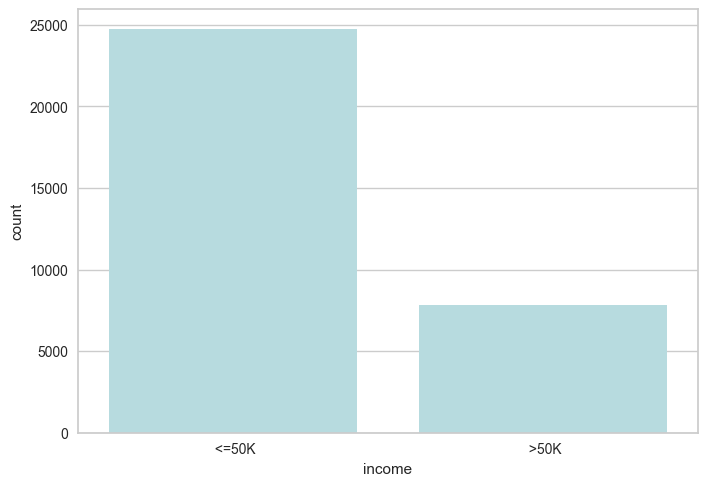

In [66]:
sns.countplot(x = df['income'], color="powderblue")

## Histograma para entender a distribuição de idade

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

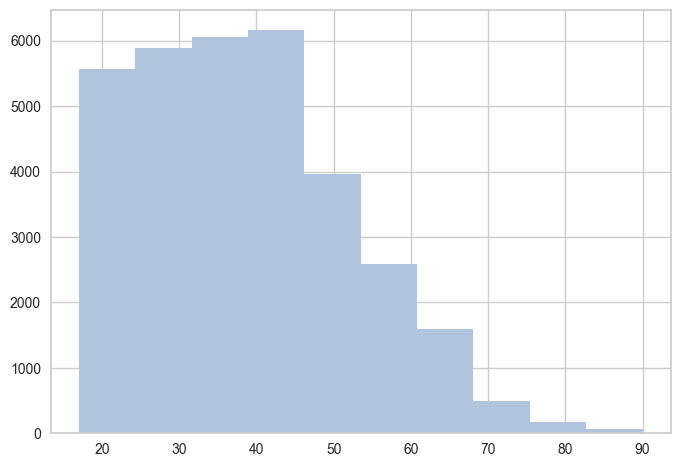

In [67]:
plt.hist(x=df['age'], color="lightsteelblue")

## Histograma para entender a distribuição de anos de educação

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

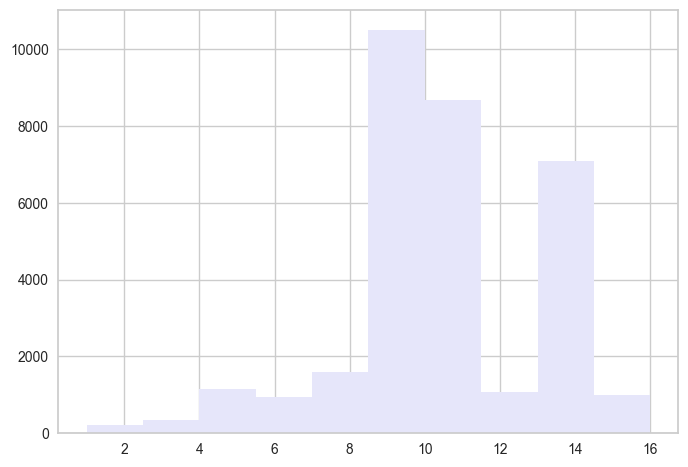

In [68]:
plt.hist(x = df['education-num'], color="lavender")

## Treemap da relação entre workclass e idade

In [69]:
grafico = px.treemap(df, path=['workclass', 'age'], color='workclass',
    color_discrete_sequence=px.colors.qualitative.Pastel2)
grafico.show()

## Treemap da relação de ocupação, relação familiar e idade

In [70]:
grafico = px.treemap(df, path=['occupation', 'relationship', 'age'], color='workclass',
    color_discrete_sequence=px.colors.qualitative.Pastel1)
grafico.show()

## Gráfico de correlação entre ocupação e relação familiar

In [71]:
grafico = px.parallel_categories(df, dimensions=['occupation', 'relationship'], height=900)
grafico.show()

## Gráfico de correlação entre workclass, ocupação e renda

In [72]:
grafico = px.parallel_categories(df, dimensions=['workclass', 'occupation', 'income'], height=600)
grafico.show()

## Gráfico de correlação entre educação e renda

In [73]:
grafico = px.parallel_categories(df, dimensions=['education', 'income'], height=500)
grafico.show()

## Separando dados para o aprendizado de máquina

In [74]:
x_census = df.iloc[:, 0:14].values
y_census = df.iloc[:, 14].values

## Testando LabelEncoder para transformar colunas não-numéricas

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_census[:, 1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], shape=(32561,), dtype=object)

In [76]:
teste = le.fit_transform(x_census[:, 1])
teste

array([7, 6, 4, ..., 4, 4, 5], shape=(32561,))

In [77]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

## Utilizando o LabelEncoder para todas as colunas não-numéricas

In [78]:
le_workclass = LabelEncoder()
le_education = LabelEncoder()
le_marital = LabelEncoder()
le_occupation = LabelEncoder()
le_relationship = LabelEncoder()
le_race = LabelEncoder()
le_sex = LabelEncoder()
le_country = LabelEncoder()

In [79]:
x_census[:,1] = le_workclass.fit_transform(x_census[:,1])
x_census[:,3] = le_education.fit_transform(x_census[:,3])
x_census[:,5] = le_marital.fit_transform(x_census[:,5])
x_census[:,6] = le_occupation.fit_transform(x_census[:,6])
x_census[:,7] = le_relationship.fit_transform(x_census[:,7])
x_census[:,8] = le_race.fit_transform(x_census[:,8])
x_census[:,9] = le_sex.fit_transform(x_census[:,9])
x_census[:,13] = le_country.fit_transform(x_census[:,13])

In [80]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

## Utilizando o One-hot Encoder para transformar as colunas não numéricas

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,4,5,6,7,8,9,13])], remainder='passthrough')

In [82]:
x_census = onehot_census.fit_transform(x_census)
x_census

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 394963 stored elements and shape (32561, 123)>

In [83]:
x_census.shape

(32561, 123)

## Utilizando o StandardScaler para deixar as colunas na mesma escala

In [84]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler(with_mean=False)
x_census = scaler_census.fit_transform(x_census)
x_census

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 394963 stored elements and shape (32561, 123)>

## Utilizando Train Test Split para definir quantidade de dados de teste e treinamento

In [85]:
from sklearn.model_selection import train_test_split
x_census_train, x_census_test, y_census_train, y_census_test = train_test_split(x_census, y_census, test_size=0.2, random_state=0)
x_census_train.shape, x_census_test.shape

((26048, 123), (6513, 123))

## Exportando os dados de treinamento e teste por meio do Pickle

In [86]:
import pickle
with open('census.pkl', mode='wb') as f:
    pickle.dump([x_census_train, y_census_train, x_census_test, y_census_test], f)

## Utilizando GaussianNB, algoritmo de Naïve Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB
import pickle
with open('census.pkl', 'rb') as f:
    x_census_train, y_census_train, x_census_test, y_census_test = pickle.load(f)

naive_census = GaussianNB()
naive_census.fit(x_census_train.toarray(), y_census_train)
predictions = naive_census.predict(x_census_test.toarray())
predictions

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      shape=(6513,), dtype='<U6')

In [88]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      shape=(6513,), dtype=object)

## Avaliando a acurácia dos dados de teste

In [89]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_test, predictions)

0.4547827422078919

## Avaliando a matriz de confusão dos dados de teste e treino

0.4547827422078919

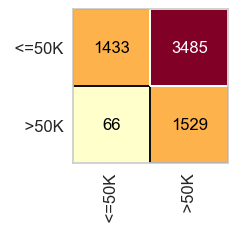

In [90]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_train.toarray(), y_census_train)
cm.score(x_census_test.toarray(), y_census_test)

## Utilizando Classification Report para avaliar o teste

In [91]:
print(classification_report(y_census_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.96      0.29      0.45      4918
        >50K       0.30      0.96      0.46      1595

    accuracy                           0.45      6513
   macro avg       0.63      0.62      0.45      6513
weighted avg       0.80      0.45      0.45      6513



## Utilizando o algoritmo KNN (K-Nearest-Neighbors)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
with open('census.pkl', 'rb') as f:
    x_census_train, y_census_train, x_census_test, y_census_test = pickle.load(f)

x_census_train.shape, y_census_train.shape

((26048, 123), (26048,))

In [93]:
x_census_test.shape, y_census_test.shape

((6513, 123), (6513,))

In [94]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(x_census_train, y_census_train)

KNeighborsClassifier(n_neighbors=10)

## Analisando as previsões com os dados reais

In [95]:
predictions = knn_census.predict(x_census_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      shape=(6513,), dtype=object)

In [96]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      shape=(6513,), dtype=object)

## Verificando a acurácia dos dados de teste com as previsões

In [97]:
accuracy_score(y_census_test, predictions)

0.8235836020267158

## Avaliando a matriz de confusão dos dados de teste e treino

0.8235836020267158

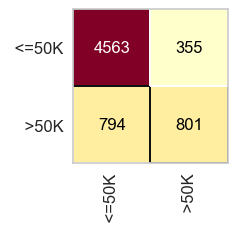

In [98]:
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(knn_census)
cm.fit(x_census_train, y_census_train)
cm.score(x_census_test, y_census_test)